### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [2]:
#Auto reloading 
#%load_ext autoreload
#%autoreload 2
#%reload_ext autoreload 

In [3]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [4]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.linux-x86_64-3.6/agent_timestep.cpython-36m-x86_64-linux-gnu.so -> 


In [5]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml

import matplotlib.pyplot as plt

/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
2021-09-29 16:09:26,668	INFO worker.py:727 -- Connecting to existing Ray cluster at address: 172.25.7.13:6379


# Create pipeline

### Network pipeline

In [6]:
seed = np.random.randint(0,9999999)
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

5573522
[33 27 42 41 11 11 22 21 29 15]


In [7]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [8]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [9]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 4.0, # 3 instead? how much stimulus the LIP gets at maximum
}


In [13]:
results = cbgt.ExecutionManager(cores=7).run([pl]*3,environment)

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=1233396) 2 4 0.161668`
(pid=1233396) 2 4 0.161668`
(pid=1233486) 2 4 0.161668`
(pid=1233486) 2 4 0.161668`
(pid=1233396) 3 5 0.161668`
(pid=1233396) 3 5 0.161668`
(pid=1233396) 10 6 1.0`
(pid=1233396) 10 8 1.0`
(pid=1233396) 10 6 1.0`
(pid=1233396) 10 8 1.0`
(pid=1233396) 10 10 0.4335`
(pid=1233486) 3 5 0.161668`
(pid=1233396) 10 10 0.4335`
(pid=1233486) 3 5 0.161668`
(pid=1233486) 10 6 1.0`
(pid=1233486) 10 8 1.0`
(pid=1233486) 10 6 1.0`
(pid=1233486) 10 8 1.0`
(pid=1233396) 10 11 0.4335`
(pid=1233396) 10 12 1.0`
(pid=1233396) 10 13 1.0`
(pid=1233396) 10 14 1.0`
(pid=1233396) 10 11 0.4335`
(pid=1233396) 10 12 1.0`
(pid=1233396) 10 13 1.0`
(pid=1233396) 10 14 1.0`
(pid=1233486) 10 10 0.4335`
(pid=1233486) 10 10 0.4335`
(pid=1233396) 10 15 0.241667`
(pid=1233396) 11 7 1.0`
(pid=1233396) 11 9 1.0`
(pid=1233396) 10 15 0.241667`
(pid=1233396) 11 7 1.0`
(pid=1233396) 11 9 1.0`
(pid=1233486) 10 11 0.4335`
(pid=1233486) 10 12 1.0`
(pid=1233486) 10 13 1.0`
(pid=1233486) 10 14 1.0`
(pid=12

(pid=1233396) 2 4 0.161668`
(pid=1233396) 3 0 1.0`
(pid=1233396) 3 1 1.0`
(pid=1233396) 2 4 0.161668`
(pid=1233396) 3 0 1.0`
(pid=1233396) 3 1 1.0`
(pid=1233486) 2 4 0.161668`
(pid=1233486) 3 0 1.0`
(pid=1233486) 3 1 1.0`
(pid=1233486) 2 4 0.161668`
(pid=1233486) 3 0 1.0`
(pid=1233486) 3 1 1.0`
(pid=1233396) 3 5 0.161668`
(pid=1233396) 10 6 1.0`
(pid=1233396) 10 8 1.0`
(pid=1233396) 3 5 0.161668`
(pid=1233396) 10 6 1.0`
(pid=1233396) 10 8 1.0`
(pid=1233396) 10 10 0.4335`
(pid=1233486) 3 5 0.161668`
(pid=1233396) 10 10 0.4335`
(pid=1233486) 3 5 0.161668`
(pid=1233486) 10 6 1.0`
(pid=1233486) 10 8 1.0`
(pid=1233486) 10 6 1.0`
(pid=1233486) 10 8 1.0`
(pid=1233396) 10 11 0.4335`
(pid=1233396) 10 12 1.0`
(pid=1233396) 10 13 1.0`
(pid=1233396) 10 11 0.4335`
(pid=1233396) 10 12 1.0`
(pid=1233396) 10 13 1.0`
(pid=1233486) 10 10 0.4335`
(pid=1233486) 10 10 0.4335`
(pid=1233396) 10 15 0.241667`
(pid=1233396) 11 7 1.0`
(pid=1233396) 11 9 1.0`
(pid=1233396) 10 15 0.241667`
(pid=1233396) 11 7 1.0`


(pid=1233396) phasetimer 101
(pid=1233396) globaltimer 3508
(pid=1233396)   action
(pid=1233396) 0   left
(pid=1233396) 1  right
(pid=1233396) chosen_action None
(pid=1233396) phasetimer 101
(pid=1233396) globaltimer 3508
(pid=1233396)   action
(pid=1233396) 0   left
(pid=1233396) 1  right
(pid=1233396) chosen_action None
(pid=1233486) phasetimer 1001
(pid=1233486) globaltimer 4610
(pid=1233486) gateFRs [0. 0.]
(pid=1233486) thresholds_crossed []
(pid=1233486) phasetimer 1001
(pid=1233486) globaltimer 4610
(pid=1233486) gateFRs [0. 0.]
(pid=1233486) thresholds_crossed []
(pid=1233396) phasetimer 1001
(pid=1233396) globaltimer 4610
(pid=1233396) gateFRs [0. 0.]
(pid=1233396) thresholds_crossed []
(pid=1233396) phasetimer 1001
(pid=1233396) globaltimer 4610
(pid=1233396) gateFRs [0. 0.]
(pid=1233396) thresholds_crossed []
(pid=1233486) phasetimer 101
(pid=1233486) globaltimer 4711
(pid=1233486)   action
(pid=1233486) 0   left
(pid=1233486) 1  right
(pid=1233486) chosen_action None
(pid=1

(pid=1233486) 3 5 0.161668`
(pid=1233486) 3 5 0.161668`
(pid=1233486) 10 6 1.0`
(pid=1233486) 10 8 1.0`
(pid=1233486) 10 6 1.0`
(pid=1233486) 10 8 1.0`
(pid=1233486) 10 10 0.4335`
(pid=1233486) 10 10 0.4335`
(pid=1233486) 10 11 0.4335`
(pid=1233486) 10 12 1.0`
(pid=1233486) 10 13 1.0`
(pid=1233486) 10 11 0.4335`
(pid=1233486) 10 12 1.0`
(pid=1233486) 10 13 1.0`
(pid=1233486) 10 15 0.241667`
(pid=1233486) 11 7 1.0`
(pid=1233486) 11 9 1.0`
(pid=1233486) 10 15 0.241667`
(pid=1233486) 11 7 1.0`
(pid=1233486) 11 9 1.0`
(pid=1233486) 11 10 0.4335`
(pid=1233486) 11 10 0.4335`
(pid=1233486) 11 11 0.4335`
(pid=1233486) 11 12 1.0`
(pid=1233486) 11 13 1.0`
(pid=1233486) 11 11 0.4335`
(pid=1233486) 11 12 1.0`
(pid=1233486) 11 13 1.0`
(pid=1233486) 11 15 0.241667`
(pid=1233486) 11 15 0.241667`
(pid=1233486) 12 10 0.8334`
(pid=1233486) 12 10 0.8334`
(pid=1233486) 12 11 0.8334`
(pid=1233486) 12 11 0.8334`
(pid=1233486) 12 15 0.8334`
(pid=1233486) 12 15 0.8334`
(pid=1233486) 13 10 0.8334`
(pid=1233486

In [14]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'popfreqs'])

In [15]:
cbgt.saveResults(results,'test',['popfreqs','popdata'])

In [16]:
results[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,500.0,500.0,59.733333,59.200000,747.066667,747.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,500.0,500.0,59.333333,59.600000,752.666667,752.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,500.0,500.0,58.133333,59.066667,742.533333,744.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,500.0,500.0,58.800000,58.533333,748.000000,750.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,500.0,500.0,58.400000,60.000000,755.600000,756.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,500.0,600.0,56.400000,58.666667,756.133333,713.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,6011
6012,500.0,600.0,56.400000,60.533333,763.600000,723.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6012
6013,500.0,500.0,54.400000,62.933333,766.800000,732.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6013
6014,500.0,600.0,54.000000,62.933333,750.800000,724.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6014


In [17]:
savedresults = cbgt.loadResults('test')
savedresults[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,500.0,500.0,59.733333,59.200000,747.066667,747.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,500.0,500.0,59.333333,59.600000,752.666667,752.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,500.0,500.0,58.133333,59.066667,742.533333,744.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,500.0,500.0,58.800000,58.533333,748.000000,750.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,500.0,500.0,58.400000,60.000000,755.600000,756.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,500.0,600.0,56.400000,58.666667,756.133333,713.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,6011
6012,500.0,600.0,56.400000,60.533333,763.600000,723.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6012
6013,500.0,500.0,54.400000,62.933333,766.800000,732.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6013
6014,500.0,600.0,54.000000,62.933333,750.800000,724.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6014


In [18]:
t_epochs = cbgt.collateVariable(results,'t_epochs')
t_epochs

[       left     right
 0  0.865103  0.000000
 1  0.000000  0.938423
 2  1.054798  0.000000
 3  0.000000  0.968918
 4  0.000000  1.015929,
        left     right
 0  0.000000  1.053821
 1  0.908127  0.000000
 2  1.203846  0.000000
 3  1.004862  0.000000
 4  0.918587  0.000000,
        left     right
 0  0.909286  0.000000
 1  0.000000  0.859691
 2  0.000000  0.833101
 3  0.969285  0.000000
 4  0.000000  0.928536]

In [19]:
# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

# LLLRLLLRLLLRRLLLLLRRRRRRLLRRRRLLRRRLRRRRLLLLLRLLRLLLLLRLLLLRLLLLLRRRRRRRRRRRRRRRRR

# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

In [20]:
Q_df = cbgt.collateVariable(results,'Q_df')
Q_df[0]

,left,right
0,0.5,0.5


In [21]:
datatables = cbgt.collateVariable(results,'datatables')

In [22]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,None,0,1001,1001,1102,1102,None,None
1,None,1203,2204,1001,1102,2305,None,None
2,None,2406,3407,1001,1102,3508,None,None
3,None,3609,4610,1001,1102,4711,None,None
4,None,4812,5813,1001,1102,5914,None,None


In [23]:
cbgt.comparisonTable(results, ['n_trials','volatility','conflict'])

,n_trials,volatility,conflict
0,5,2,0.7
1,5,2,0.7
2,5,2,0.7


In [24]:
popfreqs = cbgt.collateVariable(results,'popfreqs')

In [25]:
popdata = cbgt.collateVariable(results,'popdata')

In [26]:
popdata[0][popdata[0]['name'] == 'LIP']['column']

10    10
11    11
Name: column, dtype: int64

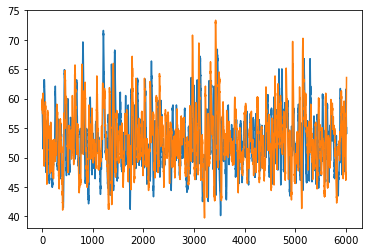

In [29]:
plt.plot(popfreqs[0].iloc[:,2])
plt.plot(popfreqs[0].iloc[:,3])
plt.show()

### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
environment = {
    'params': pd.DataFrame([[8, 30]], columns=['N', 'C']),
    'pops' : {'FSI': {'Taum': [60]}}, 
    'receps' : pd.DataFrame([[100, 100]], columns=['Tau_AMPA', 'Tau_GABA']), 
    'base' : {'FSI': {'FreqExt_AMPA': [100]}}, 
    'dpmns' : pd.DataFrame([[400, 100]], columns=['dpmn_wmax', 'dpmn_tauDOP']),
    'd1' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'd2' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : pd.DataFrame([['LIP', 'D1STR', 'AMPA', 'syn', 700, 0.027]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']), 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
environment = {
    'params': pd.DataFrame([[4, 1]], columns=['N', 'C']), 
    'pops': None,
    'receps' : None, 
    'base' : None,
    'dpmns' : None,
    'd1' : None,
    'd2' : None,
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : None, 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}

results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 

In [ ]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

In [ ]:
#?

In [ ]:
dev = cbgt.Pipeline()

In [ ]:
dev.add(codeblock_agent_phase0)

In [ ]:
output = cbgt.ExecutionManager(cores=7).run(dev,results) 